In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
digits['images'].shape

(1797, 8, 8)

In [7]:
digits['images'][3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

In [9]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [10]:
digits['data'].shape

(1797, 64)

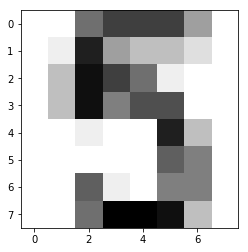

In [11]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Generating a model for the MNIST dataset

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
digits.target.shape

(1797,)

In [17]:
digits.data.shape

(1797, 64)

In [19]:
X = digits.data
y = digits.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [24]:
knn.score(X_test, y_test)

0.9833333333333333

# Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [37]:
import numpy as np
neighbors = np.arange(1, 9)

In [38]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [39]:
for i, k in enumerate(neighbors):
    print('i:{} - k:{}'.format(i,k))

i:0 - k:1
i:1 - k:2
i:2 - k:3
i:3 - k:4
i:4 - k:5
i:5 - k:6
i:6 - k:7
i:7 - k:8


In [40]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

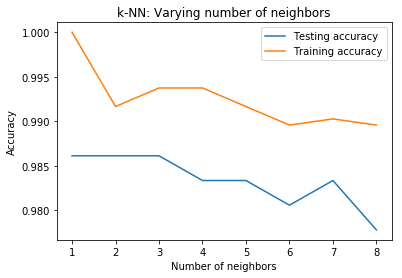

In [41]:
plt.title('k-NN: Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()